In [61]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [62]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int32)

In [63]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)

[-1.  1.  2.]
[False  True  True]


In [64]:
y = y.astype(np.int32)
print(y)

[0 1 1]


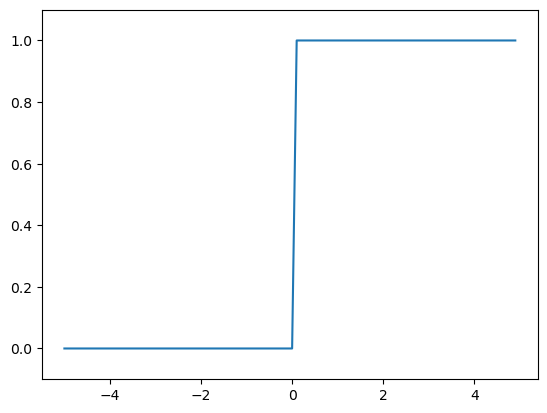

In [65]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [66]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [67]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


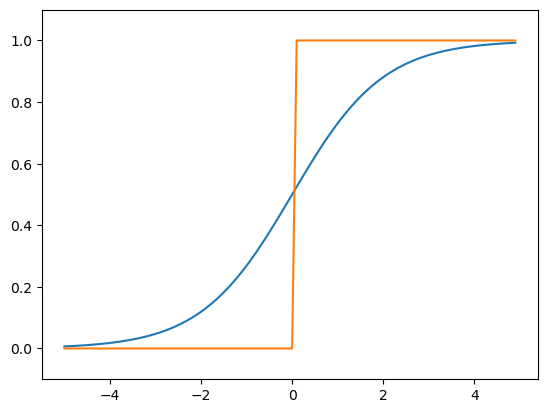

In [68]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

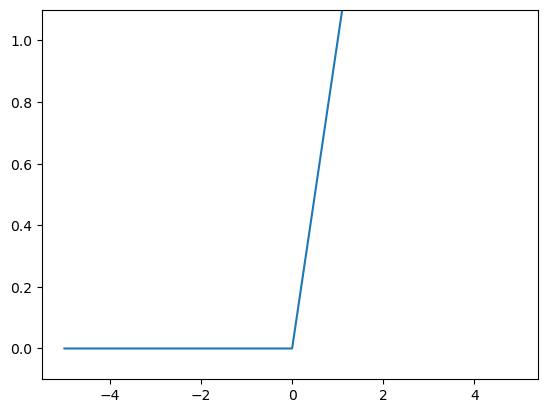

In [69]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [70]:
import numpy as np

A = np.array([1, 2, 3, 4])

print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [71]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [72]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(np.dot(A, B))

[[19 22]
 [43 50]]


In [73]:
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W.shape)

Y = np.dot(X, W)
print(Y)
print(Y.shape)

(2,)
(2, 3)
[ 5 11 17]
(3,)


In [74]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)
print(A1.shape)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
(3,)


In [75]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [76]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [77]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [78]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


In [79]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [80]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [81]:
# 개선된 소프트맥스
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [82]:
# 소프트맥스를 두 번 적용하면 랭크는 같지만 값이 다르므로 해석도 다르게된다. (거리가 다르므로)
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))


y = softmax(y)
print(y)

[0.01821127 0.24519181 0.73659691]
1.0
[0.23223815 0.2914137  0.47634815]


In [83]:
import os
print(os.getcwd())


/Users/kimhongil/Documents/GitHub/deep_learning_from_scratch/1권


In [84]:
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from dataset.mnist import load_mnist





import os
print(os.getcwd())
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

/Users/kimhongil/Documents/GitHub/deep_learning_from_scratch/1권
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [86]:
import pickle
import numpy as np
from dataset.mnist import load_mnist

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [87]:
x, t = get_data()
network = init_network()

accuracy_count = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻는다..
    if p == t[i]:
        accuracy_count += 1

print(f"Accuracy:{float(accuracy_count) / len(x)}")

Accuracy:0.9352


In [92]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [105]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_count = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_count += np.sum(p==t[i:i+batch_size])

print(f"Accuracy:{float(accuracy_count) / len(x)}")
# Accuracy:0.9352

(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)

In [102]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x.shape)
y = np.argmax(x, axis=1)
print(y)

(4, 3)
[1 2 1 0]


In [104]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
print(np.sum(y==t))

[ True  True False  True]
3
